# Activity Cliffs
Notebook Goal(s):
1. organize thoughts and try experiments for understanding activity cliffs in molecular modeling
2. organize resources on the topic
3. make some generic tools for analysis of activity cliffs

## Questions
- What are the types of cliffs? How do define them? 
- Can we automate finding the cliffs?
- Can we visualize pairs of molecules and see how they differ?
- Can we visualize where a molecule is most similar and dissimilar to it's neighbors?
- Can we visualize or maybe even predict what atoms/bonds are in/sensitive to changes using neighbor data or predicted neighbor data? 
- Can we measure and visualize a model's capacity to change prediction output relative to small changes in input structure?   
- Can we quantify how well a model handles activity cliffs? Does it get any of them right? in train? in test? how much of train and test error rate can be attributed to activity cliffs?
- Can we differentiate between real cliffs and noise? what would we need to know about the data to make claims?

## Reading Material
- [Evolving Concept of Activity Cliffs (2019)](https://pubs.acs.org/doi/10.1021/acsomega.9b02221)
- [Activity Cliff Prediction: Dataset and Benchmark (2023)](https://arxiv.org/abs/2302.07541)
  - [Code](https://github.com/DrugAI/ACNet)
  - [Data](https://drive.google.com/drive/folders/1JogBAg9AI0pUxY44w9_g8RHboLf7V5q7)
- [Exposing the Limitations of Molecular Machine Learning with Activity Cliffs (2022)](https://pubs.acs.org/doi/10.1021/acs.jcim.2c01073)
  - [Code](https://github.com/molML/MoleculeACE)
- [Large-scale prediction of activity cliffs using machine and deep learning methods of increasing complexity (2023)](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-022-00676-7)
  - [Code](https://github.com/tamshun/Large-Scale_ACPrediction)
- [A Perspective on Explanations of Molecular Prediction Models (2023)](https://pubs.acs.org/doi/full/10.1021/acs.jctc.2c01235)
- [A systematic study of key elements underlying molecular property prediction (2023)](https://www.nature.com/articles/s41467-023-41948-6)
  - [Data](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-023-41948-6/MediaObjects/41467_2023_41948_MOESM4_ESM.zip)
  - [Code](https://github.com/dengjianyuan/Respite_MPP)
- [Roughness of Molecular Property Landscapes and Its Impact on Modellability (2022)](https://pubs.acs.org/doi/abs/10.1021/acs.jcim.2c00903)
  - [Code](https://github.com/coleygroup/rogi-xd)
- [Activity cliffs in drug discovery: Dr Jekyll or Mr Hyde? (2014)](https://pubmed.ncbi.nlm.nih.gov/24560935/)
- [Exploring QSAR models for activity-cliff prediction (2023)](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-023-00708-w)
  - [Code](https://github.com/MarkusFerdinandDablander/QSAR-activity-cliff-experiments)

## Data Sets
 - The [agile data set](https://github.com/bowang-lab/AGILE/tree/main/dataset) has combinatorial collection of lipids and lots of activity cliffs*. The matter of noise in the experimental data is set aside and I am assume the activity cliffs are real. These lipids pose quite a challenge because their size and alkyl chains pose computational challenges in identifying differences. Graph-edit distance doesn't handle CCCCCC chains too well and neither does tanimoto with or without out fingerprint counts. The large size of the lipids also makes lipids look really similar with tanimoto and most of the differences are attributable to the amine head groups.  
     - * This statement needs some exploring, what is a lot? what is an activity cliff? don't we need to specify similarity metric to be precise? What are meaningful and useful ways of defining these?

#### <ins>BO + Cliffs</ins>
> In a low data regime, simple regret minimization scenario (Bayesian optimization), is it advantageous to seek out cliffs? or are we better off ignoring them and assuming a certain degree of smoothness in design space? The success of UCB acquisition policies suggests that purposefully seeking out some high risk high reward molecules could pay off. Perhaps the most straightforward approach to BO in chemical space is a Tanimoto kernel + Gaussian process + some acquisition policy, but such a kernel will almost assuredly fail to be sensitive to small but significant changes in chemical space (but lets not assume, how can we test?). If we had a kernel or more generally a probabilistic model that was sensitive to activity cliffs and insensitive to non-cliffs, than UCB or really any acquisition policy could take advantage of it. Of course it would be great if the surrogate model just outright predicted the cliffs, but I think this is generally unreasonable to expect in this problem setting since there isn't much data. Thinking pessimistically, it could lead to the model exploring high un-certainty analogs rather than spreading out over the space. From the models perspective it is still exploring, but since it only knows about uncertainties and similarities its concept of exploring could be very different from our expectations. The model could get good at once scaffold and ignore others and fail to learn easier more global molecular properties.  On balance, I hypothesize that a well calibrated surrogate model, capable of assigning high uncertainty to some analogs where we expect cliff-like behavior and low uncertainty to other analogs would compliment acquisition policies like UCB that self-regulate the balancing of exploration and exploitation. The key would be for it to be well calibrated throughout the sample acquisition process.
- What does such a surrogate model look like?
- How do attention mechanisms relate to the the sensitivity behavior we are seeking?
- Can we pre-train a model to predict if atoms/bonds/fingerprints/sub-graphs are sensitive or insensitive and then provide those predictions to some kind of attention mechanism portion of a model that predicts the regressor/class of interest?         




In [2]:
%load_ext autoreload
%autoreload 2

## Get the Data

In [3]:
import tempfile
from devkit.dataset import fetch_file, unzip_to_data_subdir, get_subdir_files_as_dict
temp_dir = tempfile.gettempdir()
temp_zip_path = tempfile.mktemp(suffix=".zip", dir=temp_dir)
url = "https://github.com/bowang-lab/AGILE/raw/81900a160f60f8d0728896d347fe569c952d6bd9/data.zip"
fetch_file(url,temp_zip_path)
unzip_to_data_subdir(temp_zip_path,'LNP_AGILE')
data = get_subdir_files_as_dict('LNP_AGILE')
data

https://github.com/bowang-lab/AGILE/raw/81900a160f60f8d0728896d347fe569c952d6bd9/data.zip -> 'C:\\Users\\ntrus\\AppData\\Local\\Temp\\tmpwjrbry8c.zip'


  0%|          | 0.00/52.1M [00:00<?, ?iB/s]

{'candidate_set_smiles_plus_features.csv': 'F:\\data\\LNP_AGILE\\data\\candidate_set_smiles_plus_features.csv',
 'finetuning_set_smiles_plus_features.csv': 'F:\\data\\LNP_AGILE\\data\\finetuning_set_smiles_plus_features.csv',
 '._candidate_set_smiles_plus_features.csv': 'F:\\data\\LNP_AGILE\\__MACOSX\\data\\._candidate_set_smiles_plus_features.csv',
 '._finetuning_set_smiles_plus_features.csv': 'F:\\data\\LNP_AGILE\\__MACOSX\\data\\._finetuning_set_smiles_plus_features.csv'}

In [4]:
import pandas as pd
df = pd.read_csv(data['finetuning_set_smiles_plus_features.csv'])
can_df = pd.read_csv(data['candidate_set_smiles_plus_features.csv'])
df

,smiles,expt_Hela,expt_Raw,desc_ABC/10,desc_ABCGG/10,desc_nBase,desc_SpAbs_A/30,desc_SpMax_A,desc_SpDiam_A,desc_SpAD_A/30,...,desc_SRW08,desc_SRW09,desc_SRW10,desc_MW/100,desc_AMW,desc_WPath/10000,desc_WPol/10,desc_Zagreb1/100,desc_Zagreb2/100,desc_mZagreb2/10
0,CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCC...,0.475362,-0.943598,3.988571,2.490832,3.0,2.365406,2.200338,4.400676,2.365406,...,8.440096,0.0,9.809891,8.027639,5.179122,2.4072,6.0,2.30,2.34,1.427778
1,CCCCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C...,0.069628,-0.471743,3.988571,2.490832,3.0,2.365406,2.200338,4.400676,2.365406,...,8.440096,0.0,9.809891,8.047795,5.125984,2.4072,6.0,2.30,2.34,1.427778
2,CCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCC...,3.245195,5.423429,3.564307,2.337770,3.0,2.110146,2.200337,4.400675,2.110146,...,8.344980,0.0,9.723224,7.206856,5.184789,1.7158,5.4,2.06,2.10,1.277778
3,CCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/C...,2.508357,2.310532,3.705728,2.390907,3.0,2.195279,2.200338,4.400676,2.195279,...,8.377701,0.0,9.752955,7.487169,5.163565,1.9248,5.6,2.14,2.18,1.327778
4,CCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C...,5.427294,0.771155,3.847150,2.441808,3.0,2.280361,2.200338,4.400676,2.280361,...,8.409385,0.0,9.781828,7.767482,5.144028,2.1550,5.8,2.22,2.26,1.377778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCC...,6.501837,1.705982,3.518325,2.407701,2.0,2.039306,2.233648,4.467296,2.039306,...,8.427487,0.0,9.852142,7.036591,5.212290,1.5633,5.6,2.06,2.13,1.233333
1196,CCCCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCCCC...,6.142469,-0.891244,3.518325,2.407701,2.0,2.039306,2.233648,4.467296,2.039306,...,8.427487,0.0,9.852142,7.056747,5.150911,1.5633,5.6,2.06,2.13,1.233333
1197,CCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCCCC=C)NCC...,8.177133,2.918444,3.094061,2.246607,2.0,1.784046,2.233648,4.467296,1.784046,...,8.331105,0.0,9.769213,6.215808,5.223368,1.0378,5.0,1.82,1.89,1.083333
1198,CCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCCCC=C)N...,-0.080869,-0.544540,3.235482,2.302550,2.0,1.869178,2.233648,4.467296,1.869178,...,8.364275,0.0,9.797627,6.496121,5.196897,1.1943,5.2,1.90,1.97,1.133333


## Basic EDA

In [10]:
from devkit.utils import tqdm_imap
import numpy as np
import pandas as pd
import umap
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import matplotlib.pyplot as plt

def smi_to_fingerprint(smiles,radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        arr = np.zeros((1,), dtype=np.uint8)
        DataStructs.ConvertToNumpyArray(fp, arr)
        return arr
    else:
        return None
    fingerprints = tqdm_imap(df.smiles.to_list(),smi_to_fingerprint,n_procs=1)

In [28]:
# Get Fingerprints
fingerprints = tqdm_imap(df.smiles.to_list(),smi_to_fingerprint,n_procs=1)
df['morgan_fp'] = fingerprints
valid_df = df.dropna(subset=['morgan_fp','expt_Hela'])

Serial f=smi_to_fingerprint:   0%|          | 0/1200 [00:00<?, ?it/s]

In [29]:
# Compute UMAP
reducer = umap.UMAP(
    verbose=False,
    n_neighbors=60,
    min_dist=1.0,
    spread=1.0,
    metric="rogerstanimoto",
    random_state=12,
    )
embedding = reducer.fit_transform(fingerprints)
valid_df['UMAP1'],valid_df['UMAP2'] = embedding[:, 0], embedding[:, 1]

f:\miniconda\envs\n8dev\lib\site-packages\umap\umap_.py:1879: UserWarning:

gradient function is not yet implemented for rogerstanimoto distance metric; inverse_transform will be unavailable

f:\miniconda\envs\n8dev\lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP(metric='rogerstanimoto', min_dist=1.0, n_neighbors=60, random_state=12, verbose=True)
Mon Jan 15 14:51:28 2024 Construct fuzzy simplicial set
Mon Jan 15 14:51:31 2024 Finding Nearest Neighbors
Mon Jan 15 14:51:31 2024 Finished Nearest Neighbor Search
Mon Jan 15 14:51:31 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Jan 15 14:51:40 2024 Finished embedding


In [ ]:
from devkit.chemistry import mol_dash_scatter
mol_dash_scatter(x=valid_df.UMAP1.to_list(),
                 y=valid_df.UMAP2.to_list(),
                 c=valid_df.expt_Hela.to_list(),
                 smi=valid_df.smiles.to_list())

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>

Tanimoto + morgan fp + UMAP shows some clusters with neighbors that are just a bond type or carbon different and yet have big deltas in y 

## Activity Cliff Analysis

In [ ]:
from devkit.chemistry import ActivityCliffAnalysis

In [32]:
aca = ActivityCliffAnalysis(valid_df.smiles.to_list(),y=valid_df.expt_Hela.to_list())

Serial f=smi_to_fingerprint:   0%|          | 0/1200 [00:00<?, ?it/s]

In [33]:
aca.add_pynn_neighbors()

  0%|          | 0/1200 [00:00<?, ?it/s]

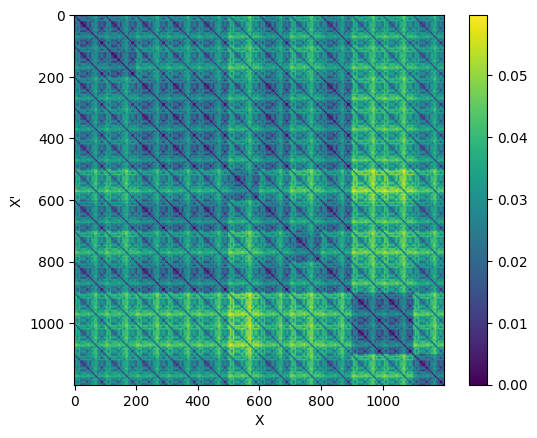

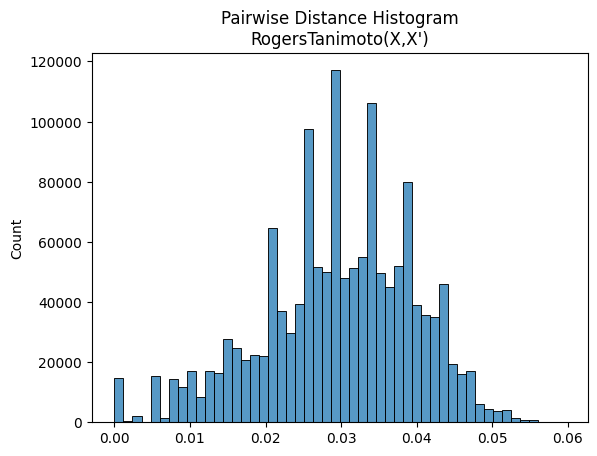

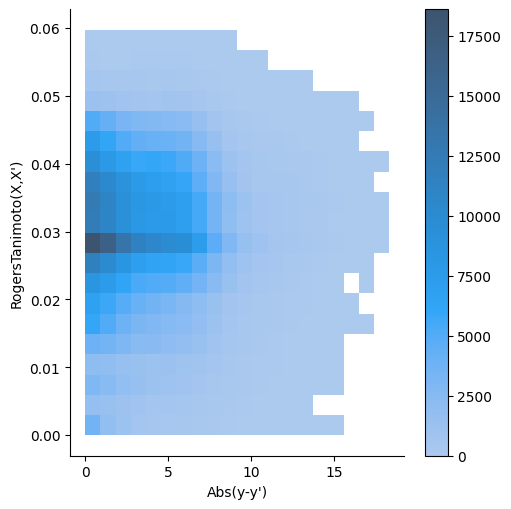

In [34]:
aca.add_dense_pairs()

In [8]:
import pynndescent
from tqdm.auto import tqdm
from devkit.utils import tqdm_imap

In [11]:
smiles = df.smiles.to_list()
Y = df.expt_Hela.to_list()
fingerprints = tqdm_imap(smiles,smi_to_fingerprint,n_procs=1)
X = np.vstack(fingerprints)
index = pynndescent.NNDescent(X,n_neighbors=30,metric='rogerstanimoto')
index.prepare()
neighbors,distances = index.neighbor_graph

Serial f=smi_to_fingerprint:   0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

In [15]:
for i, (narray,darray) in tqdm(enumerate(zip(neighbors,distances)),total=len(neighbors)):
    
    ref_smi = smiles[i]
    ref_y = Y[i]
    ref_neighbors = []
    ref_neighbor_y = []
    
    for j in range(len(narray)):
        n_idx = narray[j]
        ref_neighbors.append(smiles[n_idx])
        ref_neighbor_y.append(Y[n_idx])

    break

  0%|          | 0/1200 [00:00<?, ?it/s]

In [64]:
rdRascalMCES.RascalOptions()._

{}

In [215]:
import networkx as nx

def mol_to_nx(mol,s):
    G = nx.Graph()
    for atom in mol.GetAtoms():
        G.add_node(f"{s}{atom.GetIdx()}", atom_type=atom.GetSymbol())
    for bond in mol.GetBonds():
        G.add_edge(f"{s}{bond.GetBeginAtomIdx()}", f"{s}{bond.GetEndAtomIdx()}", bond_type=bond.GetBondType())
    return G


print('Optimal Edit Paths...')
a = mol_to_nx(Chem.MolFromSmiles('CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCCN(C)CCCN'),"A_")
b = mol_to_nx(Chem.MolFromSmiles("CCCCCCCCCCC(=O)OCCCCCC(NCCCN(C)CCCN)C(=O)NCCCCCCCC\C=C/CCCCCCCC"),"B_")

print(a)
print(b)
edit_path_generator = nx.optimize_edit_paths(
    a,
    b,
    node_match=lambda n1, n2: n1['atom_type'] == n2['atom_type'],
    edge_match=lambda e1, e2: e1['bond_type'] == e2['bond_type'],
    #node_subst_cost=lambda x,y: 1,
    #edge_subst_cost=lambda x,y: 1,
    )
for node_edit_path, edge_edit_path, cost in edit_path_generator:
    print('COST:',cost)
    print('NODE PATHS:',node_edit_path)
    print('EDGE PATHS:',edge_edit_path)

Optimal Edit Paths...
Graph with 57 nodes and 56 edges
Graph with 50 nodes and 49 edges
COST: 39.0
NODE PATHS: [('A_0', 'B_0'), ('A_1', 'B_1'), ('A_2', 'B_2'), ('A_3', 'B_3'), ('A_4', 'B_4'), ('A_5', 'B_5'), ('A_6', 'B_6'), ('A_7', 'B_7'), ('A_8', 'B_8'), ('A_9', 'B_9'), ('A_10', 'B_10'), ('A_11', 'B_13'), ('A_12', 'B_14'), ('A_13', 'B_15'), ('A_14', 'B_16'), ('A_15', 'B_17'), ('A_16', 'B_18'), ('A_17', 'B_20'), ('A_18', 'B_19'), ('A_19', 'B_21'), ('A_20', 'B_11'), ('A_21', 'B_22'), ('A_22', 'B_24'), ('A_23', 'B_25'), ('A_24', 'B_26'), ('A_25', 'B_27'), ('A_26', 'B_29'), ('A_27', 'B_12'), ('A_28', 'B_32'), ('A_29', 'B_30'), ('A_30', 'B_33'), ('A_31', 'B_34'), ('A_32', 'B_35'), ('A_33', 'B_36'), ('A_34', 'B_37'), ('A_35', 'B_38'), ('A_36', 'B_39'), ('A_37', 'B_40'), ('A_38', 'B_41'), ('A_39', 'B_42'), ('A_40', 'B_43'), ('A_41', 'B_44'), ('A_42', 'B_45'), ('A_43', 'B_46'), ('A_44', 'B_47'), ('A_45', 'B_48'), ('A_46', 'B_49'), ('A_47', 'B_23'), ('A_48', None), ('A_49', None), ('A_50', Non

KeyboardInterrupt: 

In [ ]:
import networkx as nx
from rdkit import Chem
from rdkit.Chem import rdmolops, MolFromSmiles
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D, rdDepictor
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from rdkit.Chem import rdRascalMCES
from rdkit import rdBase
rdDepictor.SetPreferCoordGen(True)

def extractHighlights(res):
    bondHighlights1 = {}
    bondHighlights2 = {}
    for bondPair in res.bondMatches():
        bondHighlights1[bondPair[0]] = (1.0, 0.0, 0.0)
        bondHighlights2[bondPair[1]] = (1.0, 0.0, 0.0)
    atomHighlights1 = {}
    atomHighlights2 = {}
    for atomPair in res.atomMatches():
        atomHighlights1[atomPair[0]] = (1.0, 0.0, 0.0)
        atomHighlights2[atomPair[1]] = (1.0, 0.0, 0.0)
    return bondHighlights1, bondHighlights2, atomHighlights1, atomHighlights2

def drawMCESMatch(mol1, bondHighlights, atomHighlights, highlightNonmatches=(0.3,0.3,1.0)):    
    d = rdMolDraw2D.MolDraw2DSVG(1500, 250)
    if highlightNonmatches:
        for bnd in mol1.GetBonds():
            if bnd.GetIdx() not in bondHighlights:
                bondHighlights[bnd.GetIdx()] = highlightNonmatches
    d.DrawMolecule(mol1,highlightAtoms=atomHighlights.keys(),highlightBonds=bondHighlights.keys(),
                   highlightAtomColors=atomHighlights,highlightBondColors=bondHighlights)
    d.FinishDrawing()
    return d


def mol_to_nx(mol,s):
    G = nx.Graph()
    for atom in mol.GetAtoms():
        G.add_node(f"{s}{atom.GetIdx()}", atom_type=atom.GetSymbol())
    for bond in mol.GetBonds():
        G.add_edge(f"{s}{bond.GetBeginAtomIdx()}", f"{s}{bond.GetEndAtomIdx()}", bond_type=bond.GetBondType())
    return G


def draw_cliffs(mol,y,neighbors,neigbor_ys):
    print(f"Ref: {mol} y: {y}")
    mol = MolFromSmiles(mol)

    mol =  Chem.MolFromSmiles('CCC')
    


    ref_nx = mol_to_nx(mol,"mol1_")
    print("Neighbors:")
    for nmol,ny in tqdm(zip(neighbors,neigbor_ys),desc='Traversal of Neighbors',total=len(neighbors)):
        print(f"\tN: {nmol} y: {ny}")
        y_delta = np.abs(y-ny)
        nmol = MolFromSmiles(nmol)
        nmol = Chem.MolFromSmiles('CCN')
        n_nx = mol_to_nx(nmol,"mol2_")

        # TODO remove these test smiles
        #mol = Chem.MolFromSmiles('CN(C)c1ccc(CC(=O)NCCCCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1')
        #nmol = Chem.MolFromSmiles('CN(C)c1ccc(CC(=O)NCCCCCCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1')
        


        opts = rdRascalMCES.RascalOptions()
        opts.similarityThreshold = 0.0
        opts.returnEmptyMCES = True
        opts.singleLargestFrag = True
        opts.allBestMCESs = True
        opts.maxBondMatchPairs = 10000
        opts.completeAromaticRings = False
        #opts.timeout = -1
        results = rdRascalMCES.FindMCES(mol, nmol,opts)
        print(results[0].tier1Sim, results[0].tier2Sim)
        res = results[0]
        print(f'MCES SMARTS : {res.smartsString}')
        print(f'Matching Bonds : {res.bondMatches()}')
        print(f'Matching Atoms : {res.atomMatches()}')
        print("RESULTS:",res)
        bondHighlights1, bondHighlights2, atomHighlights1, atomHighlights2 = extractHighlights(res)
        d = drawMCESMatch(mol, bondHighlights1, atomHighlights1)
        dd = drawMCESMatch(nmol, bondHighlights2, atomHighlights2)
        #return d, dd
    

        print('Optimal Edit Paths...')
        print(ref_nx)
        print(n_nx)
        edit_path_generator = nx.optimize_edit_paths(
            ref_nx,
            n_nx,
            node_match=lambda n1, n2: n1['atom_type'] == n2['atom_type'],
            edge_match=lambda e1, e2: e1['bond_type'] == e2['bond_type'],
            #node_subst_cost=lambda x,y: 1,
            #edge_subst_cost=lambda x,y: 1,
            )
        for node_edit_path, edge_edit_path, cost in edit_path_generator:
            print('COST:',cost)
            print('NODE PATHS:',node_edit_path)
            print('EDGE PATHS:',edge_edit_path)
        break


    pass

d,dd = draw_cliffs(ref_smi,ref_y,ref_neighbors,ref_neighbor_y)
SVG(d.GetDrawingText())


In [206]:
import networkx as nx

# Create two isomorphic graphs
G1 = nx.Graph([(1, 2), (2, 3), (3, 4)])
G2 = nx.Graph([(10, 20), (20, 30), (30, 40)])

# Check if the graphs are isomorphic
isomorphic = nx.isomorphism.is_isomorphic(G1, G2)

if isomorphic:
    print("The graphs are isomorphic.")

    # Find the mapping from nodes in G1 to nodes in G2
    node_mapping = nx.isomorphism.GraphMatcher(G1, G2)

    print("Mapping from nodes in G1 to nodes in G2:")
    print(node_mapping)
    for node_G1, node_G2 in node_mapping.items():
        print(f"{node_G1} -> {node_G2}")
else:
    print("The graphs are not isomorphic.")

The graphs are isomorphic.
Mapping from nodes in G1 to nodes in G2:


AttributeError: 'GraphMatcher' object has no attribute 'items'

In [ ]:
import networkx as nx
from networkx.algorithms import similarity

# Create two example graphs
G1 = nx.Graph([(1, 2), (2, 3), (3, 4)])
G2 = nx.Graph([(1, 2), (2, 4)])

# Compute the graph edit distance and edit paths
ged, edit_paths = similarity.optimize_graph_edit_distance(G1, G2)

# Extract the minimum set of altered nodes and edges
altered_nodes = set()
altered_edges = set()

for edit_path in edit_paths:
    for op, u, v in edit_path:
        if op == 'delete':
            altered_nodes.add(u)
        elif op == 'insert':
            altered_nodes.add(v)
        elif op == 'edge_substitute':
            altered_edges.add((u, v))
        elif op == 'edge_delete':
            altered_edges.add((u, v))
        elif op == 'edge_insert':
            altered_edges.add((u, v))

print("Minimum set of altered nodes:", altered_nodes)
print("Minimum set of altered edges:", altered_edges)


1
<rdkit.Chem.rdchem.Mol object at 0x000001D91DE6D9A0> <rdkit.Chem.rdchem.Mol object at 0x000001D91DE6DA80>
MOL A: C[N:1]([CH3:2])[c:3]1[cH:4][cH:5][c:6]([CH2:7][C:8](=[O:9])[NH:10][CH2:11][CH2:12][CH2:13][CH2:14][CH2:15][CH2:16][CH2:17][CH2:18][CH2:19][CH2:20][NH:21][C:22]23[CH2:23][CH:24]4[CH2:25][CH:26]([CH2:27]2)[CH2:28][CH:29]([CH2:30]3)[CH2:31]4)[cH:32][cH:33]1
MOL B: C[N:1]([CH3:2])[c:3]1[cH:4][cH:5][c:6]([CH2:7][C:8](=[O:9])[NH:10][CH2:11][CH2:12][CH2:13][CH2:14][CH2:15][CH2:16][CH2:17][CH2:18][CH2:19][CH2:20][CH2:21][CH2:22][NH:23][C:24]23[CH2:25][CH:26]4[CH2:27][CH:28]([CH2:29]2)[CH2:30][CH:31]([CH2:32]3)[CH2:33]4)[cH:34][cH:35]1
MCSG SMARTS = [#6]-[#7](-[#6])-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#6]-[#6](=[#8])-[#7]-[#6]-[#6]-[#6]-[#6]-[#6]-[#6]-[#6]-[#6]-[#6]-[#6]
rgroup neighbors: []
rgroup neighbors: []
2
<rdkit.Chem.rdchem.Mol object at 0x000001D91F436C00> <rdkit.Chem.rdchem.Mol object at 0x000001D91F436FF0>
MOL A: [*:1].[NH2:21][C:22]12[CH2:23][CH:24]3[CH2:25][CH:26]([CH

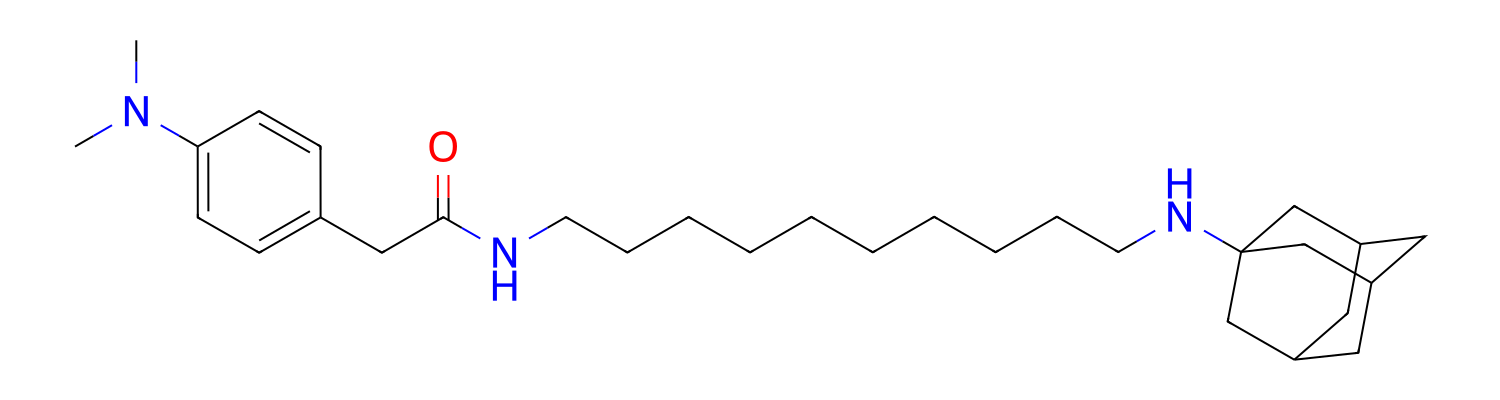

In [201]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS


def rgroup_atom(i):
    r_group_atom = Chem.MolFromSmiles(f"[*:{i}]")
    return r_group_atom

def get_neighbor_of_rgroup(mol):

    rgroup_idx = []
    idx_to_amnum = {}
    for atom in mol.GetAtoms():
        am_num = atom.GetAtomMapNum()
        symbol = atom.GetSymbol()
        idx_to_amnum[atom.GetIdx()] = am_num
        if symbol == "*":
            rgroup_idx.append(atom.GetIdx())
    
    neighbor_idx = []
    for bond in mol.GetBonds():
        aidx = bond.GetBeginAtomIdx()
        bidx = bond.GetEndAtomIdx()
        if aidx in rgroup_idx:
            neighbor_idx.append(bidx)
        if bidx in rgroup_idx:
            neighbor_idx.append(aidx)

    x = []
    for i in neighbor_idx:
        if i not in rgroup_idx:
            x.append(idx_to_amnum[i])
    #x.extend([idx_to_amnum[i] for i in rgroup_idx])
    print('rgroup neighbors:',x)
    return x

# Define a molecule
mola = Chem.MolFromSmiles("CCCCCCCNCCCCNCC")
molb = Chem.MolFromSmiles("CCCCCCCOCCCCOCC")
mola =  Chem.MolFromSmiles('CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCCN(C)CCCN')
molb =  Chem.MolFromSmiles('CCCCCCCCCCC(=O)OCCCCCC(NCCCN(C)CCCN)C(=O)NCCCCCCCC\C=C/CCCCCCCC')
mola = Chem.MolFromSmiles('CN(C)c1ccc(CC(=O)NCCCCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1')
molb = Chem.MolFromSmiles('CN(C)c1ccc(CC(=O)NCCCCCCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1')

for atom in mola.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())

for atom in molb.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())

mol1_stack = [mola,]
mol2_stack = [molb,]
smarts_stack = []
mol1_rgroup_neighbors = []
mol2_rgroup_neighbors = []

for i in [1,2,3,4,5,6]:

    mol1 = mol1_stack[-1]
    mol2 = mol2_stack[-1]

    print(i)
    print(mol1,mol2)
    print("MOL A:",Chem.MolToSmiles(mol1))
    print("MOL B:",Chem.MolToSmiles(mol2))
    for atom in mol1.GetAtoms():
        atom_index = atom.GetIdx()
        atom_type = atom.GetSymbol()
        #og_prop = atom.GetProp('_original_idx')
        #print(atom_index,atom_type)
    
    # Create MCS parameters
    params = rdFMCS.MCSParameters()
    params.AtomCompareParameters.MatchValences = True


    mcs_result = rdFMCS.FindMCS([mol1, mol2], params)
    mcs_smarts = mcs_result.smartsString
    print(f"MCSG SMARTS = {mcs_smarts}")
    if mcs_smarts == "[#0]":
        break
    else:
        smarts_pattern = Chem.MolFromSmarts(mcs_smarts)
        smarts_stack.append(smarts_pattern)

        # Replace the SMARTS match with the R-group placeholder
        new_mol1 = Chem.ReplaceSubstructs(mol1, smarts_pattern, rgroup_atom(i))[0]
        new_mol2 = Chem.ReplaceSubstructs(mol2, smarts_pattern, rgroup_atom(i))[0]

        mol1_rgroup_neighbors.extend(get_neighbor_of_rgroup(new_mol1))
        mol2_rgroup_neighbors.extend(get_neighbor_of_rgroup(new_mol2))

        mol1_stack.append(new_mol1)
        mol2_stack.append(new_mol2)


mol1_rgroup_neighbors = list(set(mol1_rgroup_neighbors))
mol2_rgroup_neighbors = list(set(mol2_rgroup_neighbors))


def get_og_atom_idx(mol):
    remaining_og_atoms = []
    for atom in mol.GetAtoms():
        am_num = atom.GetAtomMapNum()
        symbol = atom.GetSymbol()
        print(am_num,symbol)
        if symbol != "*":
            remaining_og_atoms.append(am_num)
    return remaining_og_atoms

def get_neighboring_atoms_and_bonds(mol,remaining_og_atoms,rgroup_neighbors):
    unmatched_bonds = []
    unmatched_atoms = []

    r_group_idxs = []
    for atom in mol.GetAtoms():
        symbol = atom.GetSymbol()
    
    # TODO bonds between rgroups are not part of rgroup and therfore should be part of the unmatched bonds

    for bond in mol.GetBonds():
        aidx = bond.GetBeginAtomIdx()
        bidx = bond.GetEndAtomIdx()
        idx = bond.GetIdx()
        if aidx in remaining_og_atoms or bidx in remaining_og_atoms:
            unmatched_bonds.append(idx)
        elif aidx in rgroup_neighbors or bidx in rgroup_neighbors:
            unmatched_bonds.append(idx)

    
    
    unmatched_atoms = remaining_og_atoms
    return unmatched_atoms, unmatched_bonds

def draw_mol(mol,highlight_atoms,highlight_bonds):
    h = 400
    w = 1500
    d2d = Chem.Draw.MolDraw2DSVG(w * 1, h * 1, w, h)
    dopts = d2d.drawOptions()
    dopts.addStereoAnnotation = True
    dopts.maxFontSize = -1
    dopts.annotationFontScale = 0.5
    dopts.additionalAtomLabelPadding = 0.15
    #dopts.highlightAtoms = matched_atoms
    #dopts.highlightBonds = matched_bonds
    dopts.setHighlightColour((0.9,.1,.1,.8))
    #dopts.setBackgroundColour((0,.9,.9,.3))
    d2d.DrawMolecule(mol,highlightAtoms = highlight_atoms,highlightBonds = highlight_bonds)
    d2d.FinishDrawing()
    svg_str = d2d.GetDrawingText()
    return svg_str

m1_remain = get_og_atom_idx(mol1_stack[-1])
m1_atoms,m1_bonds = get_neighboring_atoms_and_bonds(mola,m1_remain,mol1_rgroup_neighbors)
print("mol 1 remain:",m1_remain)
print("mol 1 regorup neighbors:",mol1_rgroup_neighbors)
for atom in mola.GetAtoms():
    atom.SetAtomMapNum(0)
svg_str1 = draw_mol(mola,m1_atoms,m1_bonds)

m2_remain = get_og_atom_idx(mol2_stack[-1])
m2_atoms,m2_bonds = get_neighboring_atoms_and_bonds(molb,m2_remain,mol2_rgroup_neighbors)
print("mol 2 remain:",m2_remain)
print("mol 2 regorup neighbors:",mol2_rgroup_neighbors)
for atom in molb.GetAtoms():
    atom.SetAtomMapNum(0)
svg_str2 = draw_mol(molb,m2_atoms,m2_bonds)



SVG(svg_str1)



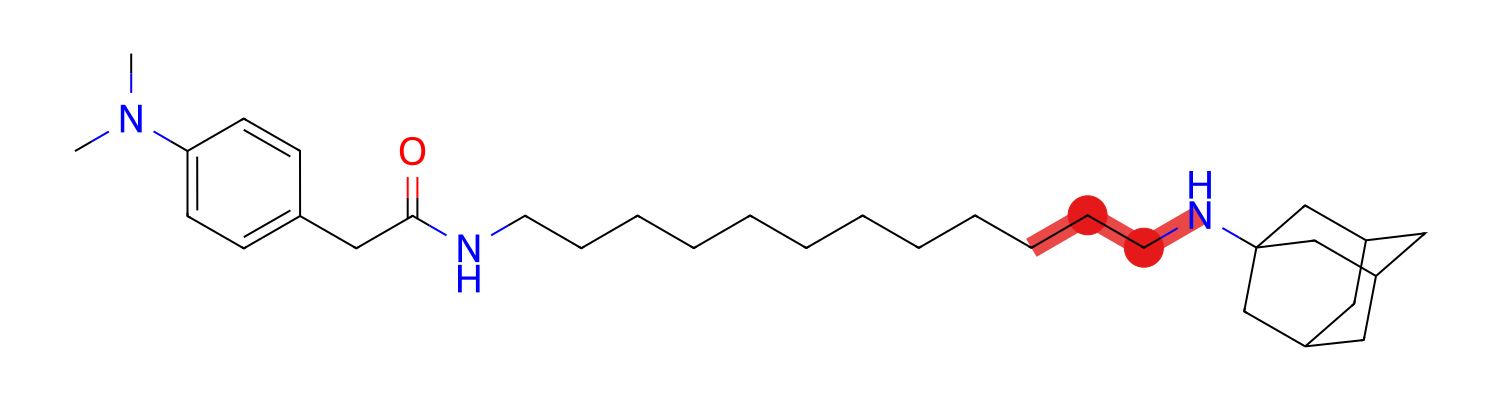

In [202]:
SVG(svg_str2)

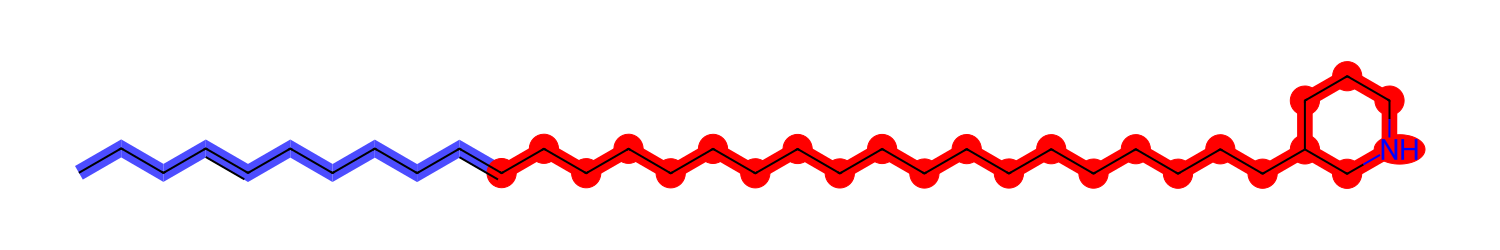

In [182]:
SVG(dd.GetDrawingText())

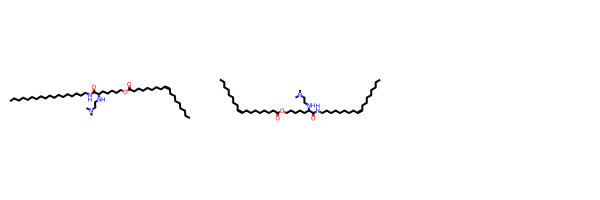

In [35]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from IPython.display import SVG
import io
from PIL import Image
import numpy as np
import rdkit

# Example Usage:
smiles1 = "CCCCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCN(C)C"
smiles2 = "CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCN(C)C"

mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)


Draw.MolsToGridImage((mol1,mol2))

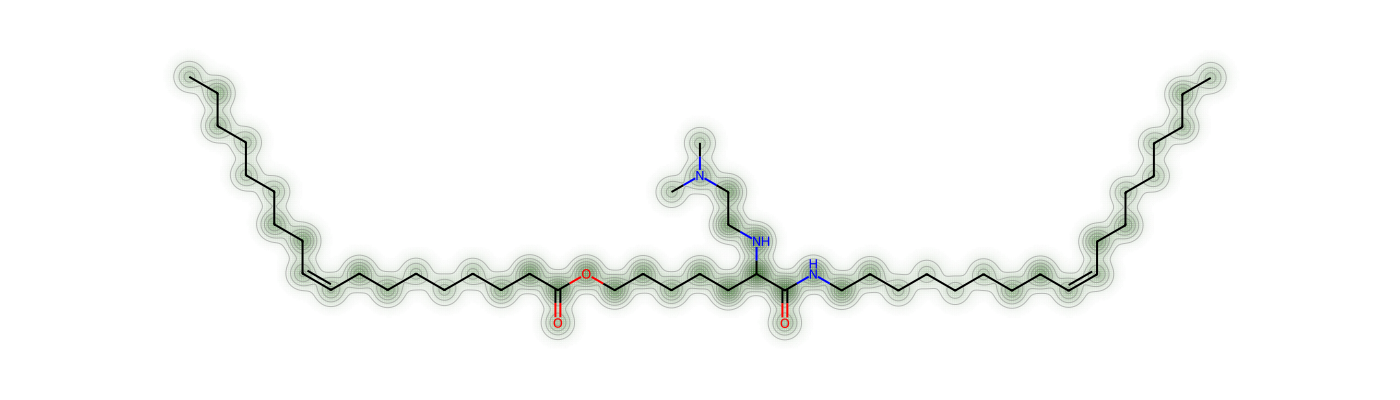

In [36]:
def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

d = Draw.MolDraw2DCairo(1400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(mol1, mol2, 
                                        lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())


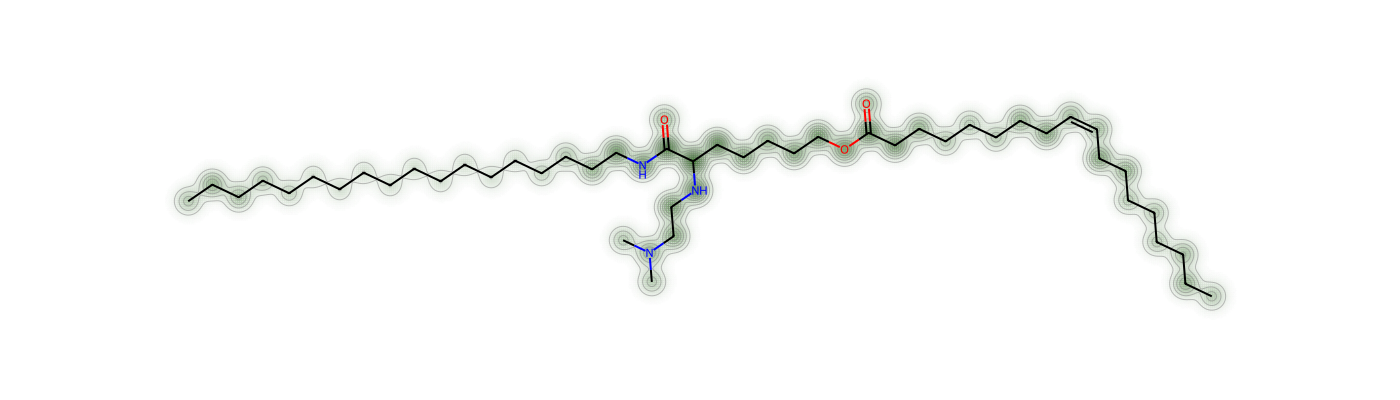

In [37]:

d = Draw.MolDraw2DCairo(1400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(mol2, mol1, 
                                        lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

In [38]:
from rdkit.Chem import rdRascalMCES
tmol1 = Chem.MolFromSmiles("CN(C)c1ccc(CC(=O)NCCCCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1 CHEMBL153934")
tmol2 = Chem.MolFromSmiles("CN(C)c1ccc(CC(=O)NCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1 CHEMBL152361")
opts = rdRascalMCES.RascalOptions()
opts.similarityThreshold = -1
opts.completeAromaticRings = False
res = rdRascalMCES.FindMCES(tmol1, tmol2, opts)
for r in res:
    print(r.smartsString)

CN(-C)-c1:c:c:c(-CC(=O)-NCCCCCCC):c:c:1.NC12CC3CC(-C1)-CC(-C2)-C3


In [39]:
smiles1 = "CCCCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCN(C)C"
smiles2 = "CCCCCCCC\C=C/CCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCC\C=C/CCCCCCCC)NCCN(C)"
mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)

# example from tutorial
#mol1 = Chem.MolFromSmiles("CN(C)c1ccc(CC(=O)NCCCCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1 CHEMBL153934")
#mol2 = Chem.MolFromSmiles("CN(C)c1ccc(CC(=O)NCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1 CHEMBL152361")

opts = rdRascalMCES.RascalOptions()
opts.allBestMCESs = True
opts.similarityThreshold = 0.7
opts.returnEmptyMCES = True
results = rdRascalMCES.FindMCES(mol2, mol1, opts)
print(results[0].tier1Sim, results[0].tier2Sim, repr(results[0].smartsString))
print(len(results))
for r in results:
    print(r.smartsString)
    print(r.bondMatches())
    print(r.atomMatches())

0.9809523809523809 0.961997226074896 ''
1

[]
[]


In [40]:
from IPython.display import SVG, display
from rdkit.Chem.Draw import rdMolDraw2D
patt = Chem.MolFromSmarts(res.smartsString)
hit_ats = list(mol1.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
   aid1 = hit_ats[bond.GetBeginAtomIdx()]
   aid2 = hit_ats[bond.GetEndAtomIdx()]
   hit_bonds.append(mol1.GetBondBetweenAtoms(aid1,aid2).GetIdx())
d = rdMolDraw2D.MolDraw2DCairo(1500, 500) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d, mol1, highlightAtoms=hit_ats,highlightBonds=hit_bonds)
show_png(d.GetDrawingText())



AttributeError: 'list' object has no attribute 'smartsString'

In [ ]:
hit_ats = list(mol2.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
   aid1 = hit_ats[bond.GetBeginAtomIdx()]
   aid2 = hit_ats[bond.GetEndAtomIdx()]
   hit_bonds.append(mol2.GetBondBetweenAtoms(aid1,aid2).GetIdx())
d = rdMolDraw2D.MolDraw2DCairo(1500, 500) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d, mol2, highlightAtoms=hit_ats,highlightBonds=hit_bonds)
show_png(d.GetDrawingText())